In [18]:
import os
import cv2
import numpy as np
import seaborn as sns
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [19]:
DATADIR = '../input/ctscancovid19/Data/'
CATEGORIES = ['normal', 'abnormal']

In [20]:
X = []
y = []
for category in CATEGORIES:

    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)

    for img in tqdm(os.listdir(path)):
        img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_array = cv2.resize(img_array, (256, 256))
        X.append(new_array)
        y.append(class_num)

100%|██████████| 1766/1766 [00:07<00:00, 241.88it/s]


In [21]:
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((3163, 256, 256, 3), (3163,))

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2372, 256, 256, 3), (2372,), (791, 256, 256, 3), (791,))

In [23]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            validation_split=0.2
)

In [24]:
regularizer = tf.keras.regularizers.l2(l=0)
regularizer_1 = tf.keras.regularizers.l2(l=0.001)
init = tf.initializers.glorot_uniform()
model = tf.keras.models.Sequential([
                                    
        tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), strides = (1, 1), padding='same', activation='relu', kernel_initializer=init, kernel_regularizer=regularizer, input_shape=(256, 256, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2), (2, 2)),
        
        tf.keras.layers.Conv2D(32, (3, 3), (1, 1), padding='same', activation='relu', kernel_initializer=init, kernel_regularizer=regularizer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2), (2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), (1, 1), padding='same', activation='relu', kernel_initializer=init, kernel_regularizer=regularizer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2), (2, 2)),
    
        tf.keras.layers.Conv2D(96, (3, 3), (1, 1), padding='same', activation='relu', kernel_initializer=init, kernel_regularizer=regularizer),
        tf.keras.layers.BatchNormalization(),    
        tf.keras.layers.MaxPooling2D((2, 2), (2, 2)),
        tf.keras.layers.SpatialDropout2D(0.2),
        
        tf.keras.layers.Conv2D(128, (3, 3), (1, 1), padding='same', activation='relu', kernel_initializer=init, kernel_regularizer=regularizer),
        tf.keras.layers.BatchNormalization(),    
        tf.keras.layers.MaxPooling2D((2, 2), (2, 2)),
        tf.keras.layers.SpatialDropout2D(0.2),
        
        tf.keras.layers.Conv2D(160, (3, 3), (1, 1), padding='same', activation='relu', kernel_initializer=init, kernel_regularizer=regularizer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2), (2, 2)),
        tf.keras.layers.SpatialDropout2D(0.2),

        
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128, activation = 'relu', kernel_initializer=init, kernel_regularizer= regularizer_1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization_14 (Batc (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
batch_normalization_15 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)       

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics = ['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
60/60 [==============================] - 4s 39ms/step - loss: 0.6959 - accuracy: 0.8034 - val_loss: 1.4329 - val_accuracy: 0.5453
Epoch 2/10
60/60 [==============================] - 2s 31ms/step - loss: 0.4101 - accuracy: 0.9267 - val_loss: 0.4858 - val_accuracy: 0.9116
Epoch 3/10
60/60 [==============================] - 2s 31ms/step - loss: 0.3156 - accuracy: 0.9631 - val_loss: 0.2800 - val_accuracy: 0.9811
Epoch 4/10
60/60 [==============================] - 2s 33ms/step - loss: 0.2571 - accuracy: 0.9831 - val_loss: 0.2512 - val_accuracy: 0.9832
Epoch 5/10
60/60 [==============================] - 2s 31ms/step - loss: 0.2336 - accuracy: 0.9821 - val_loss: 0.2245 - val_accuracy: 0.9832
Epoch 6/10
60/60 [==============================] - 2s 31ms/step - loss: 0.2068 - accuracy: 0.9895 - val_loss: 0.2099 - val_accuracy: 0.9768
Epoch 7/10
60/60 [==============================] - 2s 32ms/step - loss: 0.2096 - accuracy: 0.9810 - val_loss: 0.1994 - val_accuracy: 0.9916
Epoch 8/10
60

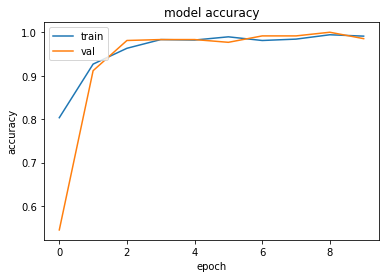

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

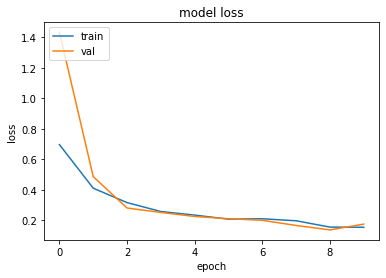

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

Text(0.5, 33.0, 'Predicted labels')

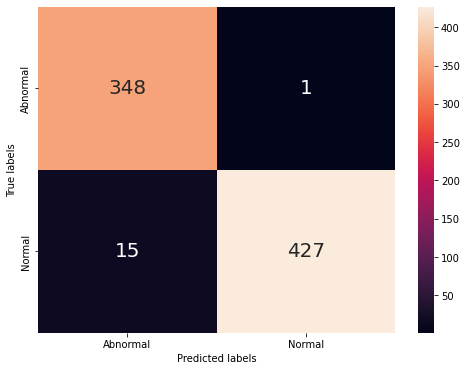

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize=(8, 6))
ticks = ['Abnormal', 'Normal']
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', xticklabels=ticks, yticklabels=ticks, annot_kws={"size":20})
plt.ylabel("True labels")
plt.xlabel("Predicted labels")